In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')  # 윈도우: Malgun Gothic, 맥: AppleGothic 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 네이버 쇼핑 '여성 의류' 크롤링 데이터
df_filtered = pd.read_csv('v2.csv')

# 불필요한 열 삭제
df_filtered = df_filtered.drop(columns=['디테일', '포인트', '타이틀URL', '사진'], errors='ignore')

df_filtered.head()

,상품,판매상,가격,배송비,카테고리,등록일,검색어,리뷰,구매,찜
0,가을 원피스 맨투맨 부드러운 면 긴팔 롱 원피스 빅사이즈,바이엘르,22800,2500,패션의류 > 여성의류 > 원피스,2022-01-21 14:23:49,원피스,3017,520,1223.0
1,에이멀 꾸안꾸 캐쥬얼 데일리룩 골지 H라인 겨울 가을 후드 니트 롱원피스,에이멀,26900,3000,패션의류 > 여성의류 > 원피스,2021-02-26 19:21:27,원피스,1657,356,1363.0
2,[자체제작] 2814 우아한 반목 H라인 니트 롱 원피스 루즈핏 결혼식 하객 가을 겨울,10가트,46800,0,패션의류 > 여성의류 > 원피스,2024-07-22 10:49:02,원피스,160,205,971.0
3,로랑 롱 원피스 (반팔/긴팔옵션),로로희,23400,3000,패션의류 > 여성의류 > 원피스,2024-04-01 17:28:37,원피스,137,135,624.0
4,"(S,M,L,XL) 가을 여성 정장원피스 빅사이즈원피스 결혼식하객룩 돌찬치 뉴쥬드",모모코다,69000,3000,패션의류 > 여성의류 > 원피스,2023-01-02 22:15:34,원피스,1225,462,3193.0


In [57]:
# 등록일 기준으로 2024 데이터만 필터링

# '등록일' 컬럼을 datetime 형식으로 변환

df_filtered['등록일'] = pd.to_datetime(df['등록일'], errors='coerce')

# 2024년 데이터만 필터링
df_2024 = df_filtered[df_filtered['등록일'].dt.year == 2024]

# 필터링된 데이터 확인
print(df_2024.head())


                                                  상품   판매상     가격   배송비  \
2   [자체제작] 2814 우아한 반목 H라인 니트 롱 원피스 루즈핏 결혼식 하객 가을 겨울  10가트  46800     0   
3                                 로랑 롱 원피스 (반팔/긴팔옵션)   로로희  23400  3000   
7                  가을 바스락 샌드 민소매 사계절 레이어드 밴딩 맥시 롱원피스   NaN  28500     0   
9                                  비너 s 절개 플레어 니트원피스   NaN  35300     0   
10                        펄 장식 재킷 플레어 원피스 GP9A0OP551   NaN  96960     0   

                 카테고리                 등록일  검색어   리뷰   구매      찜  
2   패션의류 > 여성의류 > 원피스 2024-07-22 10:49:02  원피스  160  205  971.0  
3   패션의류 > 여성의류 > 원피스 2024-04-01 17:28:37  원피스  137  135  624.0  
7   패션의류 > 여성의류 > 원피스 2024-09-04 19:30:28  원피스   47    0  132.0  
9   패션의류 > 여성의류 > 원피스 2024-10-24 18:45:14  원피스   29    0    NaN  
10  패션의류 > 여성의류 > 원피스 2024-08-10 16:25:57  원피스    0    0  126.0  


In [58]:
# '남성의류' 또는 '남성수영복' 키워드가 포함된 행 삭제
df_2024 = df_2024[~df_2024['카테고리'].str.contains('남성의류|남성수영복', case=False, na=False)]

# 전환율 컬럼 추가
df_2024['전환율'] = (df_2024['구매'] / df_2024['찜']) * 100

# 분석할 카테고리 리스트
selected_categories = ['원피스', '상의', '하의', '수트/셋업', '테마의류', '아우터', '수영복', '임부복']

# 요청한 카테고리만 필터링
df_category_filtered = df_2024[df_2024['카테고리'].str.contains('|'.join(selected_categories))]

# 카테고리별 평균 전환율 계산
category_conversion = df_category_filtered.groupby('카테고리')['전환율'].mean().reset_index()

# 결과 확인
print(category_conversion)

                           카테고리        전환율
0           스포츠/레저 > 수영 > 여성수영복        NaN
1    스포츠/레저 > 수영 > 여성수영복 > 모노키니   1.095462
2   스포츠/레저 > 수영 > 여성수영복 > 반신수영복   1.912837
3     스포츠/레저 > 수영 > 여성수영복 > 비키니   1.350172
4  스포츠/레저 > 수영 > 여성수영복 > 원피스수영복   5.265950
5   스포츠/레저 > 수영 > 여성수영복 > 전신수영복   0.000000
6             출산/육아 > 임부복 > 원피스  10.736370
7             패션의류 > 여성의류 > 원피스   2.905625


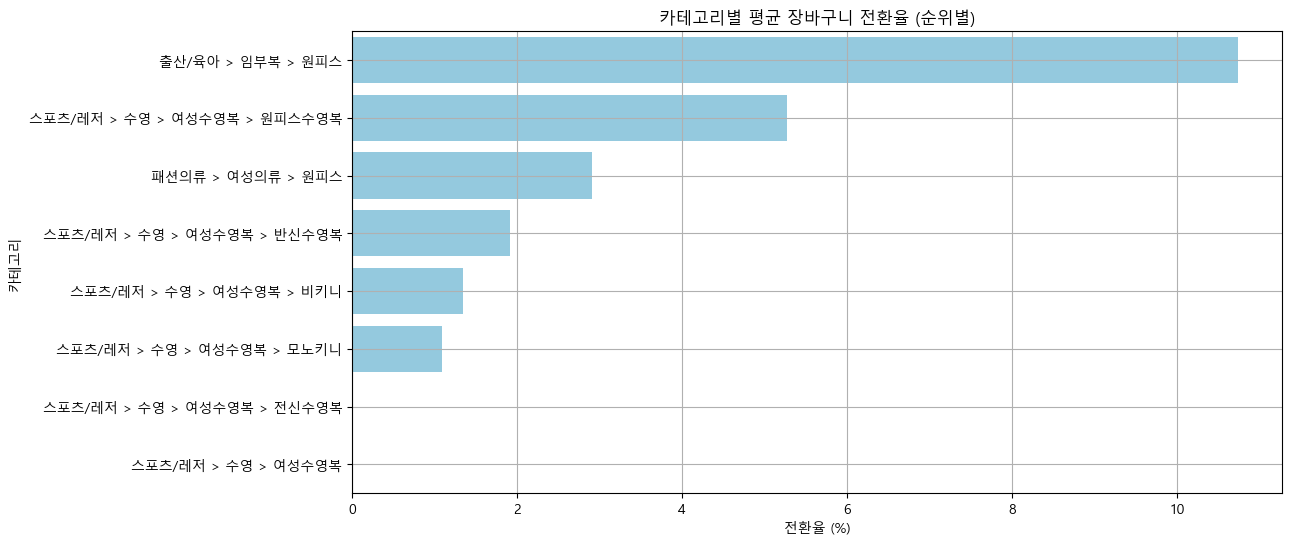

In [59]:
# 카테고리별 장바구니에서 구매 전환율

# 카테고리별 전환율을 내림차순으로 정렬하여 시각화
category_conversion_sorted = category_conversion.sort_values(by='전환율', ascending=False)

# 카테고리별 전환율 순위 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=category_conversion_sorted, x='전환율', y='카테고리', color='skyblue')
plt.title('카테고리별 평균 장바구니 전환율 (순위별)')
plt.xlabel('전환율 (%)')
plt.ylabel('카테고리')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

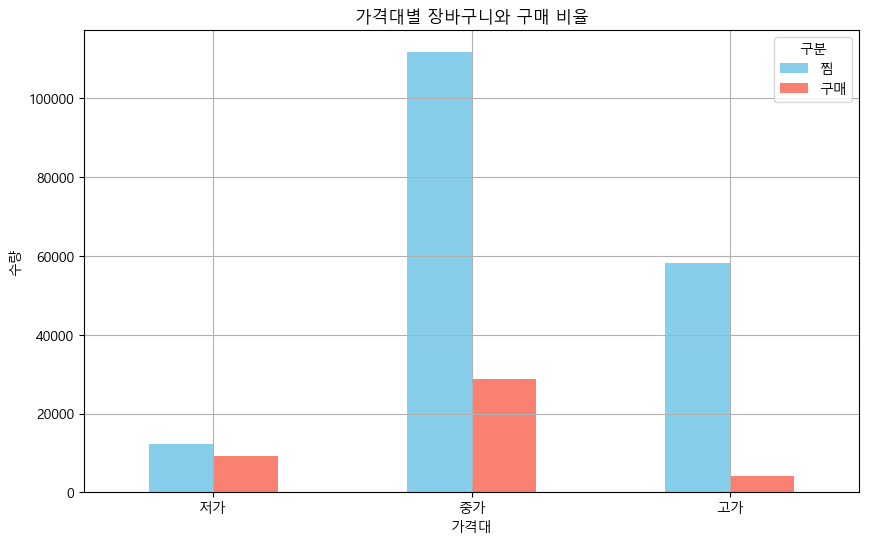

In [53]:
# 가격대별 장바구니와 구매 데이터 관계 분석

price_group = df_2024.groupby('가격대', observed=True)[['찜', '구매']].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
price_group.set_index('가격대')[['찜', '구매']].plot(kind='bar', color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('가격대별 장바구니와 구매 비율')
plt.xlabel('가격대')
plt.ylabel('수량')
plt.xticks(rotation=0)
plt.legend(title='구분')
plt.grid(True)
plt.show()

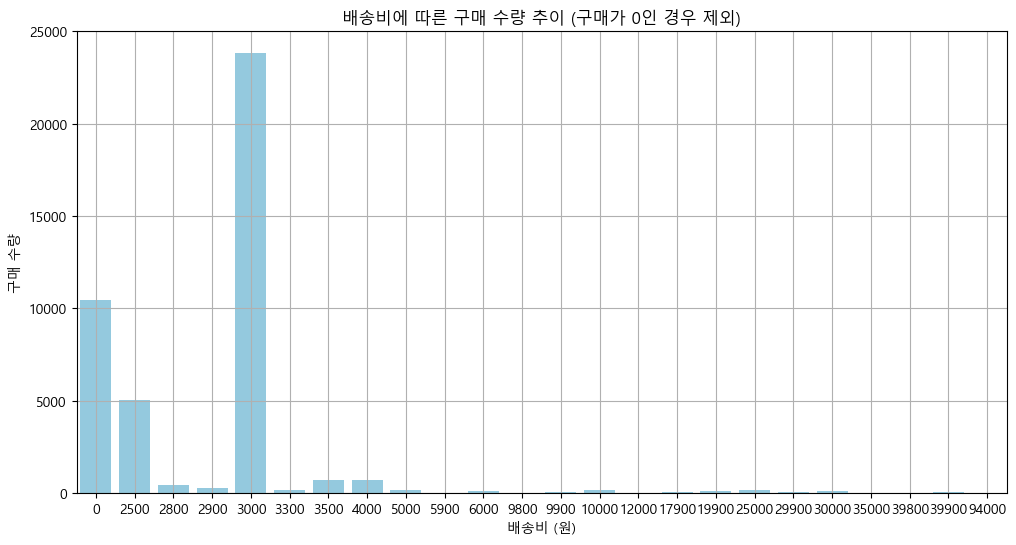

In [52]:
# 배송비에 따른 구매 추이

# 구매 수량이 0이 아닌 경우만 필터링
shipping_purchase_nonzero = shipping_purchase[shipping_purchase['구매'] > 0]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=shipping_purchase_nonzero, x='배송비', y='구매', color='skyblue')
plt.title('배송비에 따른 구매 수량 추이 (구매가 0인 경우 제외)')
plt.xlabel('배송비 (원)')
plt.ylabel('구매 수량')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()